In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')

# 교통인프라 데이터 불러오기

In [ ]:
data=pd.read_csv('/content/인프라지수_자료모음.csv')

In [ ]:
data3=data.copy()

In [ ]:
data3

,시군구코드,평균 접근 시간(분),정류장 밀도,철도역 밀도,발생량,1인당 대중교통 이용량,평균 환승 횟수,평균 환승 대기시간,대중교통 환승 이용 비율,환승 발생량,평균 통행거리(km),접근 가능 시설 수(개)
0,11010,33.093514,37.2,0.000000,182474355,31294.331596,33.9772,45293.0,8.4746,29362965.0,12.0,1.940723
1,11020,25.704874,31.9,0.100604,212871059,17477.213692,13.7726,23669.0,7.0540,33236539.0,12.0,2.631206
2,11030,25.394027,34.0,0.077160,123011097,12621.346798,26.5910,36689.0,11.6868,26487958.0,11.0,2.403543
3,11040,24.701797,41.9,0.000000,103326461,6266.025410,22.8651,36417.0,9.5599,16931148.0,10.0,2.487086
4,11050,24.488365,36.0,0.000000,113175517,5753.989880,20.1311,34806.0,9.5304,21681189.0,10.0,2.726035
...,...,...,...,...,...,...,...,...,...,...,...,...
222,38380,96.339879,72.0,0.000000,194887,3822.992435,0.0000,0.0,0.0000,0.0,30.0,0.864253
223,38390,101.515392,0.1,0.000000,317023,4244.571936,0.0672,2414.0,0.0037,0.0,15.0,0.625147
224,38400,112.678656,1.1,0.000000,134327,3205.095751,0.0000,0.0,0.0000,0.0,22.0,0.262855
225,39010,81.823492,53.5,0.000000,43221316,86043.696305,202.4572,877042.0,48.1075,4906087.0,10.0,0.568986


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

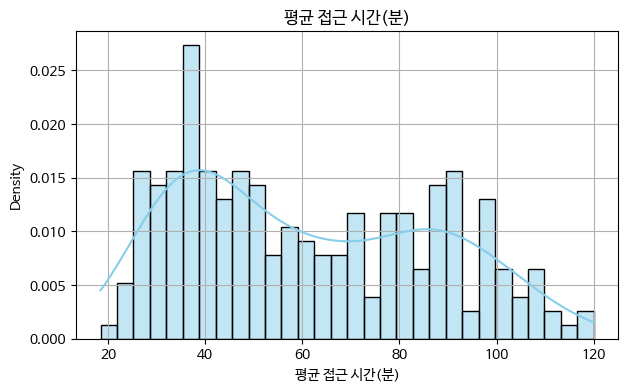

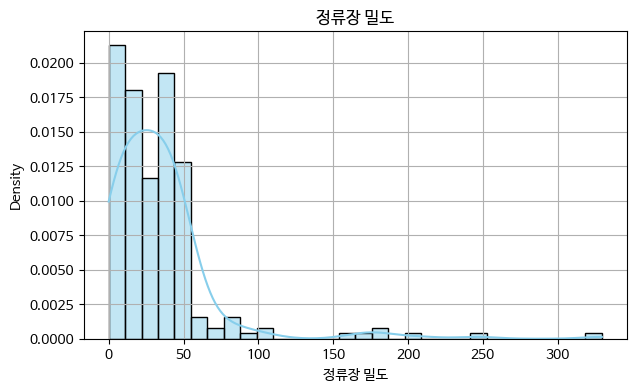

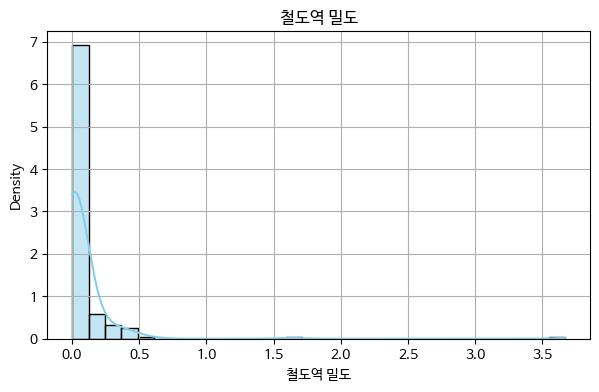

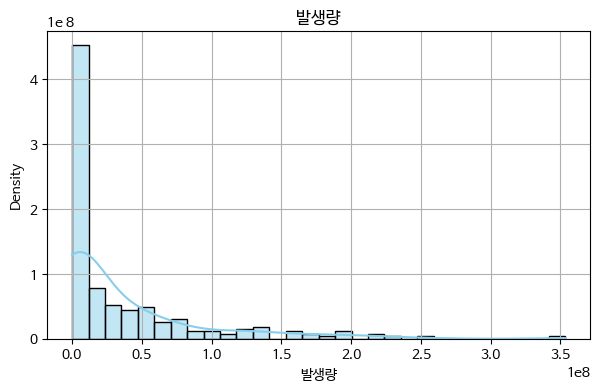

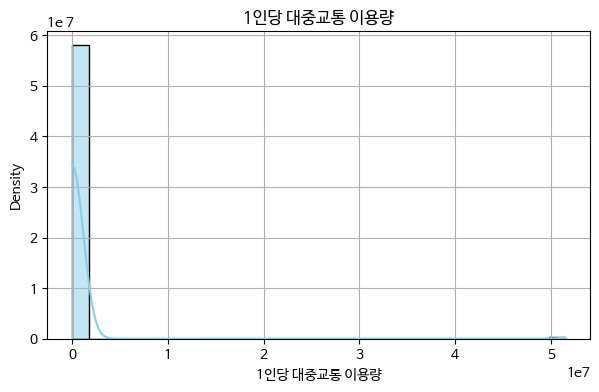

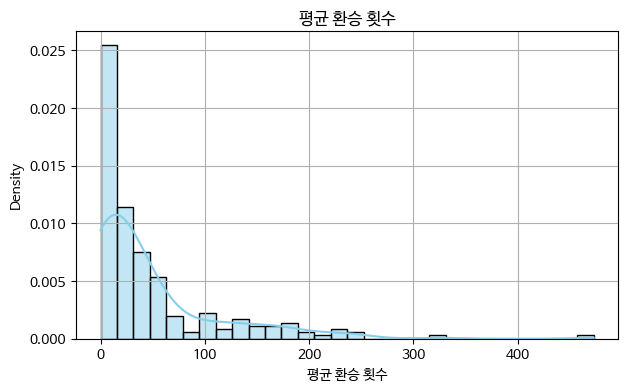

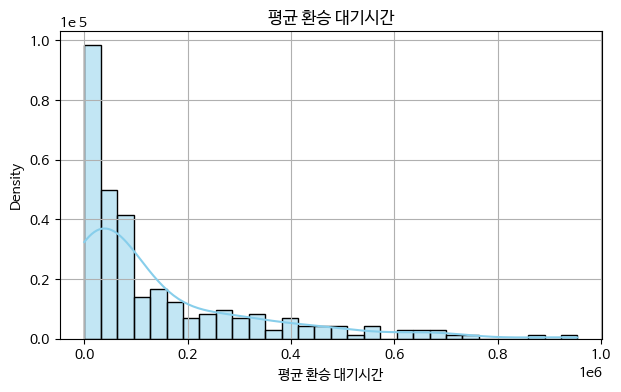

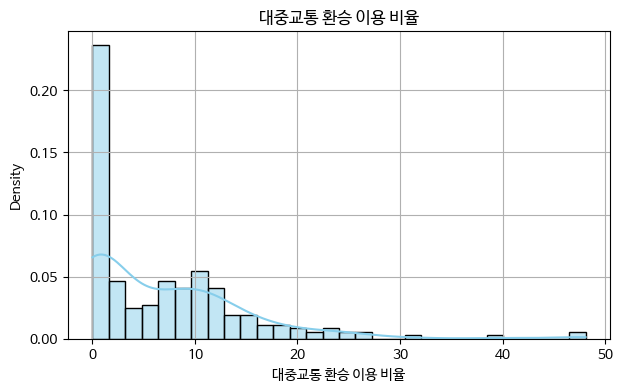

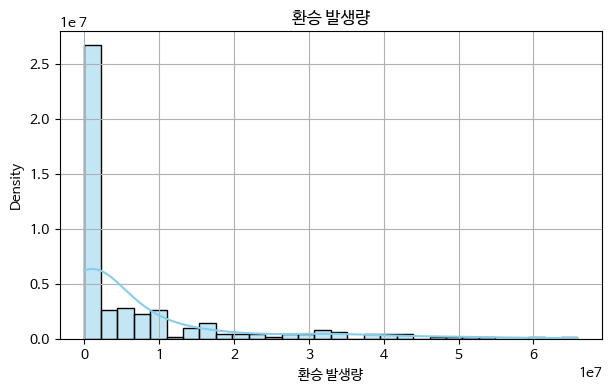

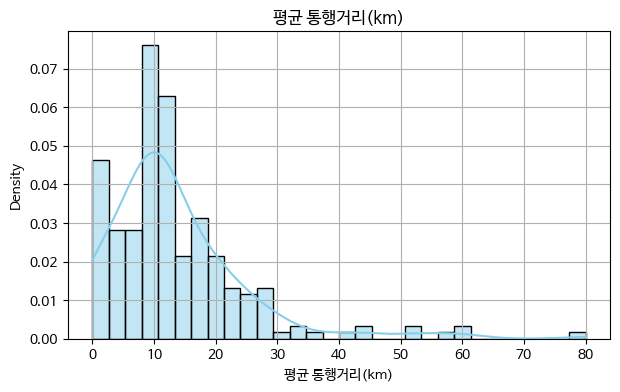

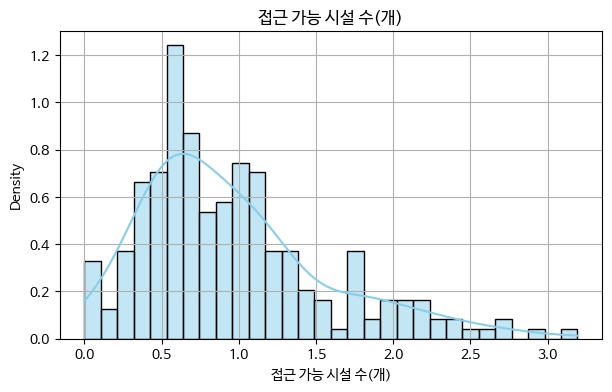

In [ ]:
columns = data3.columns.drop('시군구코드')

# 각 변수에 대해 정규분포 그래프 그리기
for col in columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data3[col].dropna(), kde=True, stat='density', color='skyblue', bins=30)
    plt.title(f"{col}")
    plt.grid(True)
    plt.show()

In [ ]:
data3.skew()

,0
시군구코드,-1.061339
평균 접근 시간(분),0.354162
정류장 밀도,3.912703
철도역 밀도,10.063742
발생량,2.349157
1인당 대중교통 이용량,15.065234
평균 환승 횟수,2.524497
평균 환승 대기시간,1.818464
대중교통 환승 이용 비율,1.874633
환승 발생량,2.330338


# skew가 3이상인 변수: 정류장밀도, 철도역밀도, 1인당 대중교통 이용량-> 로그 변환 진행

In [ ]:
#로그변환 (왜도가 3이상인 경우에 로그변환진행함)
data3['정류장 밀도'] = np.log1p(data3['정류장 밀도'])
data3['철도역 밀도'] = np.log1p(data3['철도역 밀도'])
data3['1인당 대중교통 이용량'] = np.log1p(data3['1인당 대중교통 이용량'])

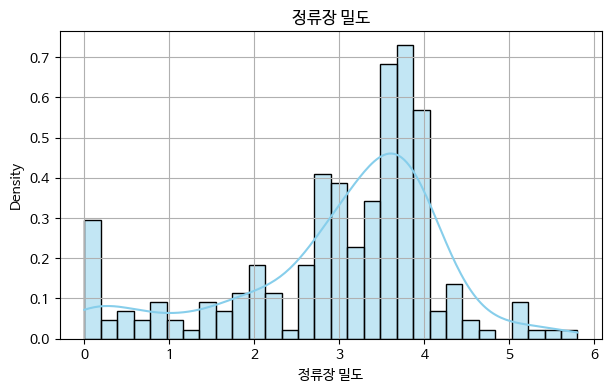

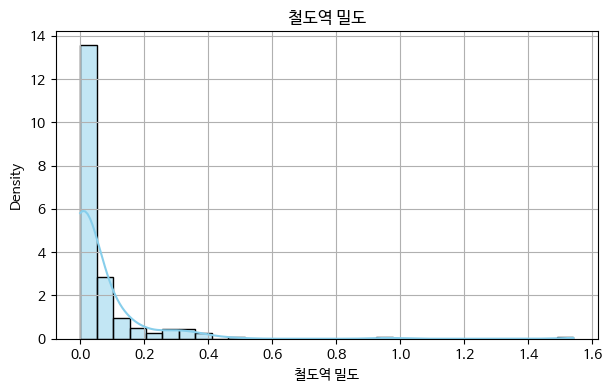

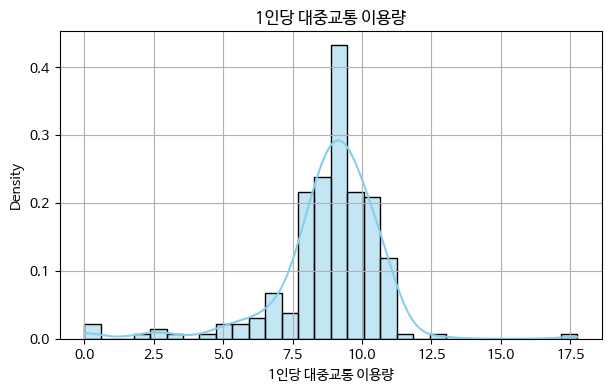

In [ ]:
columns = ['정류장 밀도','철도역 밀도','1인당 대중교통 이용량']

# 각 변수에 대해 정규분포 그래프 그리기
for col in columns:
    plt.figure(figsize=(7, 4))
    sns.histplot(data3[col].dropna(), kde=True, stat='density', color='skyblue', bins=30)
    plt.title(f"{col}")
    plt.grid(True)
    plt.show()

# 정규화 진행

In [ ]:
from sklearn.preprocessing import StandardScaler
X = data3.drop(['시군구코드', '발생량'], axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 정규화된 값으로 원래 컬럼 덮어쓰기
data3[X.columns] = X_scaled

# 회귀분석 진행
x: 시군구코드와 발생량을 제외한 변수들
y: 발생량

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression


# X와 y 분리
X = data3.drop(['시군구코드','발생량'],axis=1)
y = data3['발생량']

# 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 회귀 계수 및 절편 출력
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

print("회귀 계수:")
print(coefficients)
print("\n절편 (intercept):", intercept)

# R^2 점수 확인 (모델 설명력)
print("\n설명력 (R^2):", model.score(X, y))

회귀 계수:
평균 접근 시간(분)     -1.255697e+06
정류장 밀도          -3.551990e+04
철도역 밀도          -4.605759e+05
1인당 대중교통 이용량     1.883385e+06
평균 환승 횟수        -4.009734e+06
평균 환승 대기시간       9.717854e+03
대중교통 환승 이용 비율    5.219492e+06
환승 발생량           4.941430e+07
평균 통행거리(km)     -3.865350e+05
접근 가능 시설 수(개)    3.314095e+06
dtype: float64

절편 (intercept): 35340341.299559474

설명력 (R^2): 0.9522670569872287


회귀계수를 모두 더한 뒤 각 계수를 정규화(총합으로 나눔)하여 가중치로 활용,
해당 가중치를 변수값에 곱해 만든 "교통인프라수준 지수"를 만듦

In [ ]:
norm_weights = model.coef_ / np.sum(np.abs(model.coef_))  # 절댓값 기준 합 1
data31=data3.copy()
data31['교통인프라지수_norm'] = 0

# 적용
for i in range(len(norm_weights)):
    data31['교통인프라지수_norm'] += norm_weights[i] * X.iloc[:, i]


sc=data31.sort_values(by='교통인프라지수_norm', ascending=False)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# (2) 상수항 추가 (회귀식의 절편 포함)
X_const = add_constant(X)

# (3) VIF 계산
vif_data = pd.DataFrame()
vif_data["변수명"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# 결과 출력
print(vif_data)


              변수명       VIF
0           const  1.000000
1     평균 접근 시간(분)  2.572722
2          정류장 밀도  1.420670
3          철도역 밀도  1.081202
4    1인당 대중교통 이용량  1.392594
5        평균 환승 횟수  6.528045
6      평균 환승 대기시간  4.459693
7   대중교통 환승 이용 비율  6.251153
8          환승 발생량  2.740220
9     평균 통행거리(km)  1.282257
10  접근 가능 시설 수(개)  2.114081


다중공산성을 보았을때, 모든변수의 VIF <=10이하임

In [ ]:
result=sc[['시군구코드','교통인프라지수_norm']]
result.to_csv('/content/교통인프라지수_최종(3).csv')